In [ ]:
import opendatasets as od
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [ ]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [ ]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

In [ ]:
raw_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

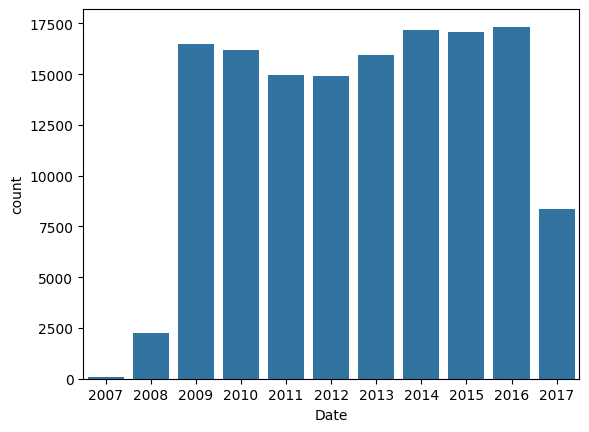

In [ ]:
sns.countplot(x=pd.to_datetime(raw_df['Date']).dt.year,data=raw_df)
plt.show()

In [ ]:
train_df = raw_df[pd.to_datetime(raw_df['Date']).dt.year<2015]
test_df = raw_df[pd.to_datetime(raw_df['Date']).dt.year>=2015]


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97988 non-null  object 
 1   Location       97988 non-null  object 
 2   MinTemp        97674 non-null  float64
 3   MaxTemp        97801 non-null  float64
 4   Rainfall       97988 non-null  float64
 5   Evaporation    61657 non-null  float64
 6   Sunshine       57942 non-null  float64
 7   WindGustDir    91120 non-null  object 
 8   WindGustSpeed  91160 non-null  float64
 9   WindDir9am     90969 non-null  object 
 10  WindDir3pm     96036 non-null  object 
 11  WindSpeed9am   97114 non-null  float64
 12  WindSpeed3pm   96919 non-null  float64
 13  Humidity9am    96936 non-null  float64
 14  Humidity3pm    96872 non-null  float64
 15  Pressure9am    88876 non-null  float64
 16  Pressure3pm    88857 non-null  float64
 17  Cloud9am       63000 non-null  float64
 18  Cloud3pm  

In [ ]:
train_input_cols = train_df.columns.tolist()
train_input_cols.remove('RainTomorrow')
train_input_cols.remove('Date')
train_output_cols =  ['RainTomorrow']
train_input_df = train_df[train_input_cols]
train_output_df = train_df[train_output_cols]
train_input_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [ ]:
numeric_cols = train_input_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = list(set(train_input_df.columns) - set(numeric_cols))
train_input_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_input_df[numeric_cols] = imputer.fit_transform(train_input_df[numeric_cols])
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       97988 non-null  object 
 1   MinTemp        97988 non-null  float64
 2   MaxTemp        97988 non-null  float64
 3   Rainfall       97988 non-null  float64
 4   Evaporation    97988 non-null  float64
 5   Sunshine       97988 non-null  float64
 6   WindGustDir    91120 non-null  object 
 7   WindGustSpeed  97988 non-null  float64
 8   WindDir9am     90969 non-null  object 
 9   WindDir3pm     96036 non-null  object 
 10  WindSpeed9am   97988 non-null  float64
 11  WindSpeed3pm   97988 non-null  float64
 12  Humidity9am    97988 non-null  float64
 13  Humidity3pm    97988 non-null  float64
 14  Pressure9am    97988 non-null  float64
 15  Pressure3pm    97988 non-null  float64
 16  Cloud9am       97988 non-null  float64
 17  Cloud3pm       97988 non-null  float64
 18  Temp9am   

<ipython-input-33-1152197572d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input_df[numeric_cols] = imputer.fit_transform(train_input_df[numeric_cols])


In [ ]:
imputer2 = SimpleImputer(strategy='most_frequent')
train_input_df[categorical_cols] = imputer2.fit_transform(train_input_df[categorical_cols])
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97988 entries, 0 to 144552
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       97988 non-null  object 
 1   MinTemp        97988 non-null  float64
 2   MaxTemp        97988 non-null  float64
 3   Rainfall       97988 non-null  float64
 4   Evaporation    97988 non-null  float64
 5   Sunshine       97988 non-null  float64
 6   WindGustDir    97988 non-null  object 
 7   WindGustSpeed  97988 non-null  float64
 8   WindDir9am     97988 non-null  object 
 9   WindDir3pm     97988 non-null  object 
 10  WindSpeed9am   97988 non-null  float64
 11  WindSpeed3pm   97988 non-null  float64
 12  Humidity9am    97988 non-null  float64
 13  Humidity3pm    97988 non-null  float64
 14  Pressure9am    97988 non-null  float64
 15  Pressure3pm    97988 non-null  float64
 16  Cloud9am       97988 non-null  float64
 17  Cloud3pm       97988 non-null  float64
 18  Temp9am   

<ipython-input-34-683b74c1e44f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input_df[categorical_cols] = imputer2.fit_transform(train_input_df[categorical_cols])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_input_df[numeric_cols] = scaler.fit_transform(train_input_df[numeric_cols])
train_input_df.describe()

<ipython-input-35-21ce4d42f582>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input_df[numeric_cols] = scaler.fit_transform(train_input_df[numeric_cols])


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483675,0.519582,0.006396,0.064199,0.532098,0.265239,0.161980,0.215685,0.686287,0.514695,0.611797,0.596243,0.478106,0.490075,0.493170,0.520315
std,0.149457,0.133673,0.022962,0.038045,0.203740,0.102419,0.102805,0.101424,0.189008,0.206376,0.111333,0.109952,0.255395,0.237981,0.138521,0.133024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377358,0.421456,0.000000,0.046117,0.524476,0.193798,0.080460,0.149425,0.570000,0.370000,0.543802,0.526403,0.333333,0.333333,0.392625,0.423828
50%,0.478774,0.507663,0.000000,0.064199,0.532098,0.255814,0.149425,0.218391,0.690000,0.520000,0.611797,0.596243,0.478106,0.490075,0.488069,0.509766
75%,0.591981,0.613027,0.002156,0.067961,0.643357,0.310078,0.218391,0.275862,0.830000,0.650000,0.682645,0.665017,0.666667,0.666667,0.590022,0.609375
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(train_input_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_input_df[encoded_cols] = encoder.transform(train_input_df[categorical_cols])

<ipython-input-36-7034904fb66a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input_df[encoded_cols] = encoder.transform(train_input_df[categorical_cols])
<ipython-input-36-7034904fb66a>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input_df[encoded_cols] = encoder.transform(train_input_df[categorical_cols])
<ipython-input-36-7034904fb66a>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

In [ ]:
train_input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64872 entries, 0 to 140694
Columns: 120 entries, Location to WindDir9am_nan
dtypes: float64(115), object(5)
memory usage: 59.9+ MB


In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6,random_state=42)

CPU times: user 106 µs, sys: 0 ns, total: 106 µs
Wall time: 141 µs


In [ ]:
%%time
model.fit(train_input_df[encoded_cols+numeric_cols],train_output_df)

CPU times: user 1.17 s, sys: 96.9 ms, total: 1.27 s
Wall time: 1.27 s


DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
train_preds = model.predict(train_input_df[encoded_cols+numeric_cols])
from sklearn.metrics import accuracy_score
accuracy_score(train_output_df,train_preds)

0.8468690043678818